In [13]:
!pip install image-classifiers

In [14]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-364w5xvf
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-364w5xvf
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp36-none-any.whl size=19950 sha256=142c6c5632033c49a72b9c7fb52f82a695397cdfac69dc049bdbd760c45bdcc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-dwm93zdw/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from keras.datasets import cifar100, cifar100

In [0]:
from classification_models.keras import Classifiers 
ResNet18, preprocess_input = Classifiers.get('resnet18') 

model = ResNet18((224, 224, 3), weights='imagenet',include_top=False)

In [0]:
import numpy as np
import cv2
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [0]:
from keras.preprocessing import image

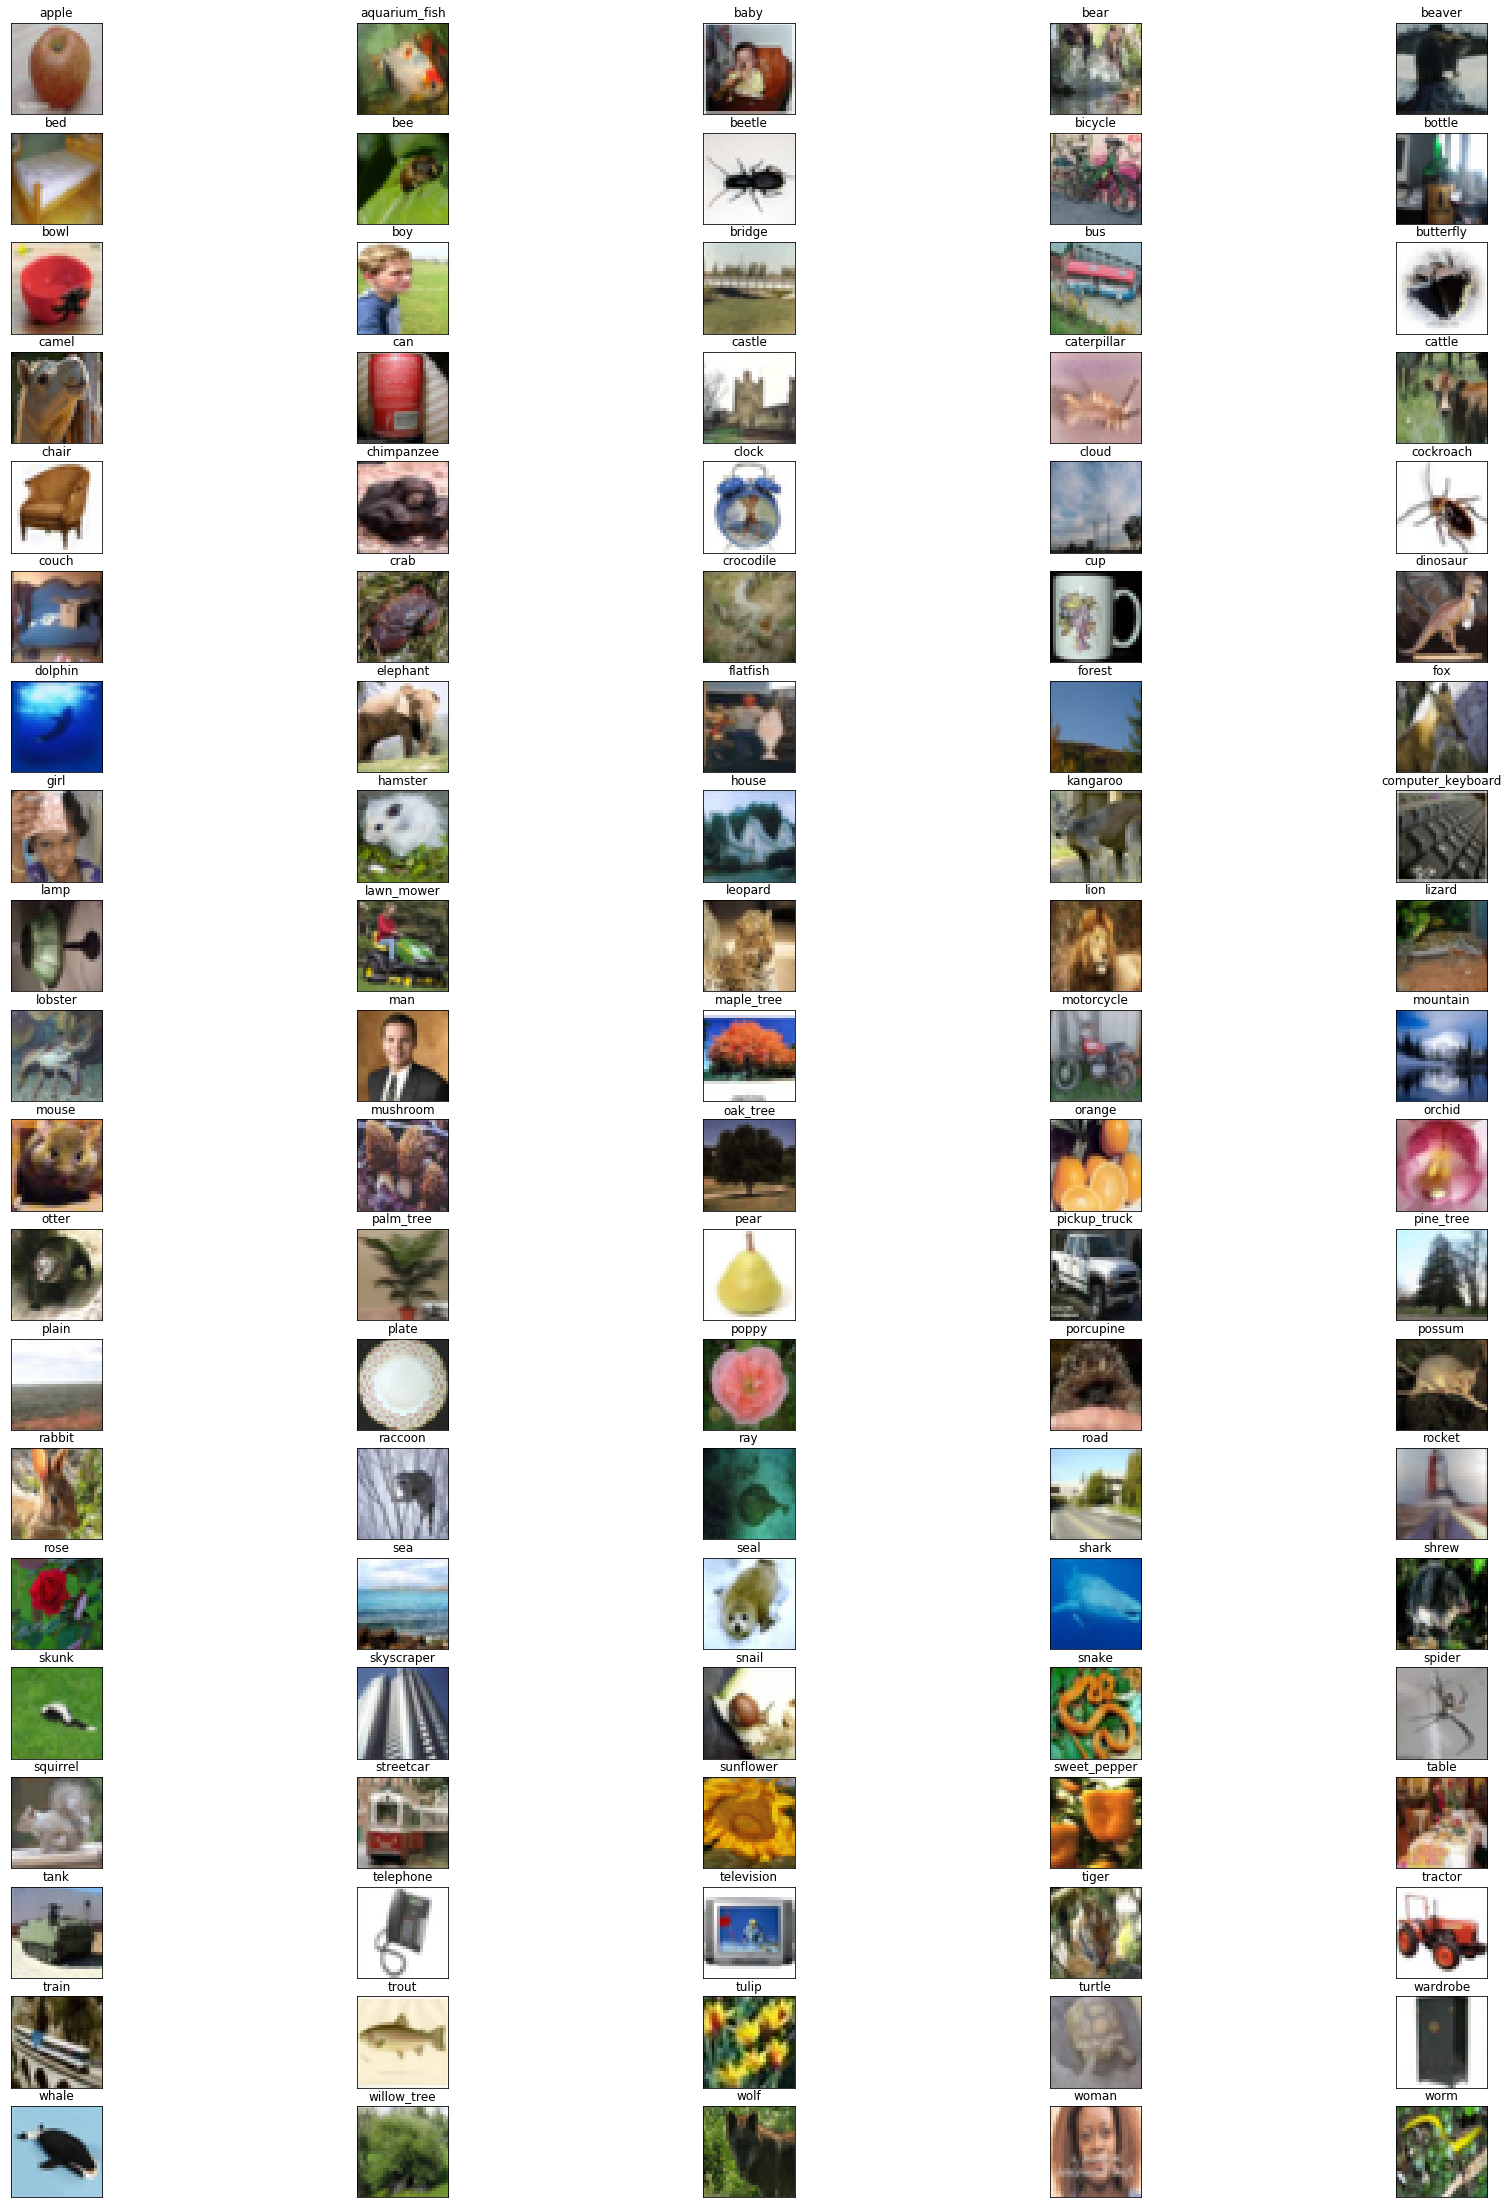

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,40))
num_classes = 100
class_names = [
'apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud',
    'cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','computer_keyboard','lamp','lawn_mower','leopard','lion','lizard',
    'lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit',
    'raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger',
    'tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm',]
#class_names = ['airplane','automobile','bird','cat','deer',
 #              'dog','frog','horse','ship','truck']
for i in range(num_classes):
    ax = fig.add_subplot(20, 5, i+1, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im)
    ax.set_title(class_names[i])
plt.show()

In [20]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_19[0][0]          
____________________________________________________________________________________________

In [0]:
from keras.layers import Softmax, Activation, Convolution2D, Dense, GlobalAveragePooling2D
gap = GlobalAveragePooling2D()(model.get_layer('relu1').output)
fc = Dense(512, activation = 'relu')(gap)
prediction = Activation('softmax')(fc)

In [22]:
from keras import Model
model = Model(input=[model.input], output=prediction)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_19[0][0]          
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`
  


In [0]:
new_shape = (224,224)
x_train = np.asarray([cv2.resize(image, new_shape) for image in x_train])
x_test = np.asarray([cv2.resize(image, new_shape) for image in x_test])

In [0]:
from keras.optimizers import SGD


# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

model.fit(x_train, y_train,
               batch_size=128,
               epochs=25,
               validation_data=(x_test, y_test),
               shuffle=False)

print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 139s 3ms/step - loss: 4.4680 - acc: 0.1790 - val_loss: 3.2914 - val_acc: 0.3275
Epoch 2/25
50000/50000 [==============================] - 131s 3ms/step - loss: 2.4562 - acc: 0.4762 - val_loss: 1.9631 - val_acc: 0.5481
Epoch 3/25
50000/50000 [==============================] - 131s 3ms/step - loss: 1.7333 - acc: 0.6077 - val_loss: 1.6418 - val_acc: 0.6084
Epoch 4/25
50000/50000 [==============================] - 131s 3ms/step - loss: 1.3912 - acc: 0.6772 - val_loss: 1.4228 - val_acc: 0.6528
Epoch 5/25
50000/50000 [==============================] - 131s 3ms/step - loss: 1.1766 - acc: 0.7264 - val_loss: 1.3024 - val_acc: 0.6742
Epoch 6/25
50000/50000 [==============================] - 128s 3ms/step - loss: 1.0329 - acc: 0.7629 - val_loss: 1.2291 - val_acc: 0.6894
Epoch 7/25
50000/50000 [==

NameError: ignored

### Accuracy of the base model trained on ImageNet is 73.25%

### Removing the dense layers will give an accuracy of upto 75%